In [2]:
!pip install matplotlib

In [3]:
import torch
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d
SR1 = {
    4: 0,  # chair
    8: 1,  # shelf
    7: 2,  # door
    12: 3,  # sink
    13: 4  # sofa
}

SR2 = {
    10: 0,  # bed
    14: 1,  # toilet
    5: 2,  # desk
    6: 3,  # display
    9: 2  # table
}

SR3 = {
    0: 404,  # bag
    1: 404,  # bin
    2: 404,  # box
    3: 404,  # cabinet
    11: 404  # pillow
}


test_file = h5py.File('3D_OS_release_data/ScanObjectNN/h5_files/main_split/test_objectdataset.h5', 'r')
train_file = h5py.File('3D_OS_release_data/ScanObjectNN/h5_files/main_split/training_objectdataset.h5', 'r')


src = 'SR1'

print(test_file.keys())
print(train_file.keys())

test_labels  = test_file['label'][:]
train_labels = train_file['label'][:]

test_clouds = test_file['data'][:]
train_clouds = train_file['data'][:]

all_labels = np.hstack((train_labels, test_labels))
all_clouds = np.vstack((train_clouds, test_clouds))


SR1_indices = [index for index, value in enumerate(all_labels) if value in SR1.keys()]
SR2_indices = [index for index, value in enumerate(all_labels) if value in SR2.keys()]
SR3_indices = [index for index, value in enumerate(all_labels) if value in SR3.keys()]

SR1_clouds = all_clouds[SR1_indices]
SR2_clouds = all_clouds[SR2_indices]
SR3_clouds = all_clouds[SR3_indices]

SR1_labels = [SR1[all_labels[id]] if src == 'SR1' else 404 for id in SR1_indices]
SR2_labels = [SR2[all_labels[id]] if src == 'SR2' else 404 for id in SR2_indices]
SR3_labels = [404 for _ in SR3_indices]


<KeysViewHDF5 ['data', 'label', 'mask']>
<KeysViewHDF5 ['data', 'label', 'mask']>


In [4]:
len(SR1_indices), len(SR1_labels)

(1255, 1255)

In [5]:
def load_from_file(filename):
    return torch.load(filename, map_location=torch.device('cpu'))

SR1_labels = [SR1[all_labels[id]] for id in SR1_indices]
SR2_labels = [SR2[all_labels[id]] for id in SR2_indices]
for folder, split in zip(['DGCNN_CE_SR1', 'DGCNN_CE_SR2', 'PN2_CE_SR1', 'PN2_CE_SR2'], ['SR1', 'SR2', 'SR1', 'SR2']):
    src_labels = load_from_file(f'resources/tensors/{folder}/src_labels.pt').numpy()
    if split == 'SR1':
        src_comp = SR1_labels
    elif split == 'SR2':
        src_comp = SR2_labels
    assert np.all(src_labels == src_comp), "Labels not corresponding"

print("All labels correspond")



All labels correspond


In [6]:
print(type(SR1_clouds[0]))

<class 'numpy.ndarray'>


In [7]:
%matplotlib inline

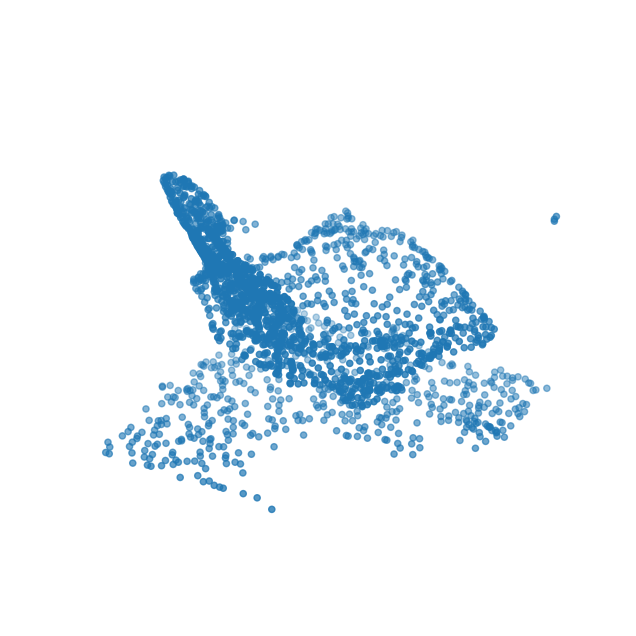

chair


In [21]:
def render_cloud(cloud:np.ndarray, filename:str=None) -> None:
    x = cloud[:, 0]
    z = cloud[:, 1]
    y = cloud[:, 2]

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x, y, z)
    ax.axis('off')
    plt.show()


id = 9

render_cloud(SR1_clouds[id])

lab_to_text = {
    0: 'chair',
    1: 'shelf',
    2: 'door',
    3: 'sink',
    4: 'sofa'
}

print(lab_to_text[SR1_labels[id]])
